###Import Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib

Using matplotlib backend: agg


In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

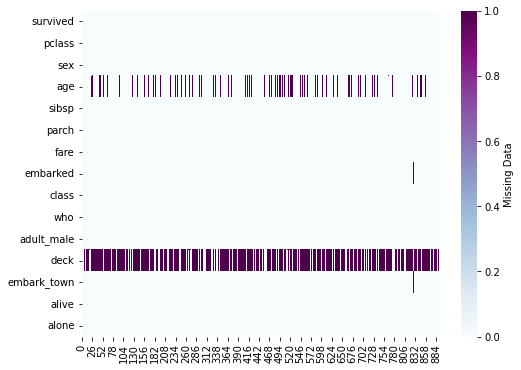

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.isna().transpose(),
            cbar_kws={'label':'Missing Data'},
            cmap='BuPu')
plt.show()

<Figure size 576x432 with 0 Axes>

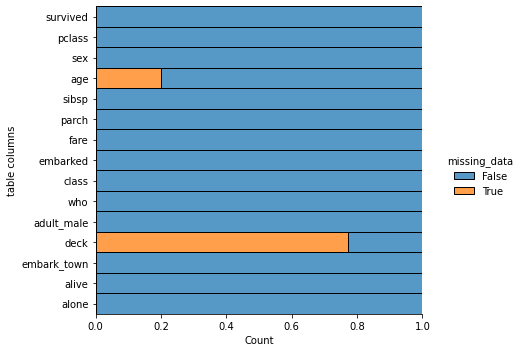

In [8]:

#note distribution plot hides the data which is very small as it gets hidden at the zero indices between x and y axis,
# heatmap does better job in finding that
plt.figure(figsize=(8,6))
sns.displot(
            data=titanic.isna().melt(value_name="missing_data"),
            y="variable",
            hue="missing_data",
            multiple="fill",
            aspect=1.25,
            rug_kws={'lw':2}
            )
plt.ylabel('table columns')
plt.show()

In [9]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Text(0.5, 1.0, 'Age distribution and outliers between Male and Female')

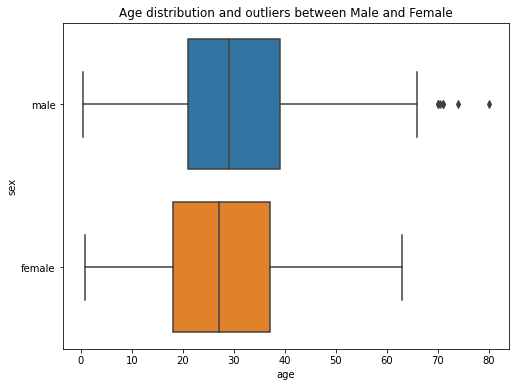

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='age',y='sex',data=titanic)
plt.title("Age distribution and outliers between Male and Female")

Text(0.5, 1.0, 'Distribution between Passenger Class and Deck Category')

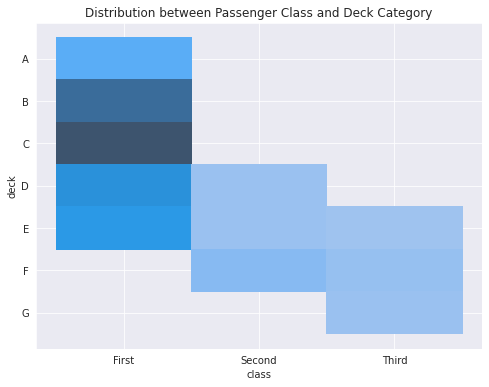

In [11]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.histplot(x='class',y='deck',data=titanic)
plt.title("Distribution between Passenger Class and Deck Category")

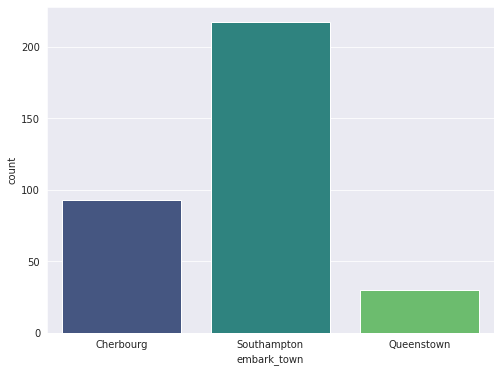

In [47]:
plt.figure(figsize=(8,6))
#sns.scatterplot(x='class',y='deck',hue='class',s=100,alpha=1.0,data=titanic)
sns.countplot(x='embark_town', data=titanic.loc[titanic.survived == 1], palette='viridis')

In [15]:
#pd.set_option('display.max_rows', 10)
#mean_age = titanic[(titanic.sex == 'male') & (titanic.age.isna())]
#mean_age.insert(1, "empty_age", np.nan)
#man_age = titanic.age.fillna(value=titanic.age.mode()).copy()
#mean_age.assign(empty_age=lambda x: True if x.age.empty()  else False)
#mean_age

In [48]:
titanic.age.fillna(titanic.age.mean(),inplace=True)
titanic.fillna({'embarked':'S', 'embark_town': 'Southampton'}, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
